# Titanic Project Week 2

In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Step 1: read the data

In [3]:
tit = pd.read_csv('train.csv')
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 2: Plot surviving vs drowned passengers

In [5]:
surv = tit.groupby('Survived').count()
surv.reset_index(inplace = True)
surv.rename(columns = {'PassengerId': 'Number of Passengers'}, inplace =True)

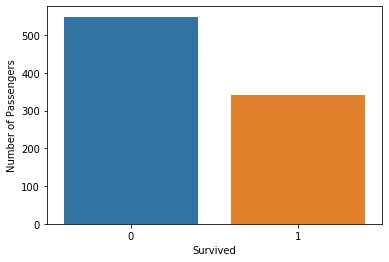

In [6]:
sns.barplot(data = surv, x = 'Survived', y = 'Number of Passengers')

# Step 3: Proportion of surviving 1st passengers

In [7]:
tit.groupby(['Pclass', 'Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [8]:
first_class_Surv = (tit.loc[(tit['Pclass'] == 1) & (tit['Survived']==1)])
first_class = tit.loc[(tit['Pclass'] == 1)]
first_class_Surv['PassengerId'].count()/first_class['PassengerId'].count()

0.6296296296296297

# Step 4: Barplot for different class Passengers and male/female

In [23]:
tit_summary = tit.groupby(['Pclass', 'Sex']).count().reset_index()
tit_summary

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,female,94,94,94,85,94,94,94,94,81,92
1,1,male,122,122,122,101,122,122,122,122,95,122
2,2,female,76,76,76,74,76,76,76,76,10,76
3,2,male,108,108,108,99,108,108,108,108,6,108
4,3,female,144,144,144,102,144,144,144,144,6,144
5,3,male,347,347,347,253,347,347,347,347,6,347


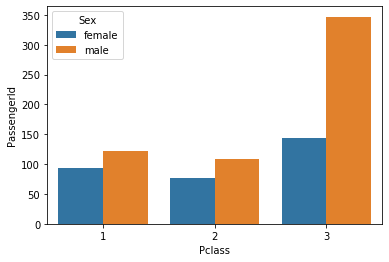

In [24]:
sns.barplot(data = tit_summary, x = 'Pclass', y = 'PassengerId', hue = 'Sex')

In [3]:
tit_Emb = tit.groupby(['Pclass', 'Embarked', 'Survived']).count()
tit_Emb
#sns.barplot(data = tit_summary, x = 'Pclass', y = 'PassengerId', hue = 'Embarked')

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  \
Pclass Embarked Survived                                                      
1      C        0                  26    26   26   21     26     26      26   
                1                  59    59   59   53     59     59      59   
       Q        0                   1     1    1    1      1      1       1   
                1                   1     1    1    1      1      1       1   
       S        0                  53    53   53   42     53     53      53   
                1                  74    74   74   66     74     74      74   
2      C        0                   8     8    8    7      8      8       8   
                1                   9     9    9    8      9      9       9   
       Q        0                   1     1    1    1      1      1       1   
                1                   2     2    2    1      2      2       2   
       S        0                  88    88   88   82     88     88      88   
                1                  76    76   76   74     76     76      76   
3      C        0                  41    41   41   23     41     41      41   
                1                  25    25   25   18     25     25      25   
       Q        0                  45    45   45   18     45     45      45   
                1                  27    27   27    6     27     27      27   
       S        0                 286   286  286  229    286    286     286   
                1                  67    67   67   61     67     67      67   

                          Fare  Cabin  
Pclass Embarked Survived               
1      C        0           26     16  
                1           59     50  
       Q        0            1      1  
                1            1      1  
       S        0           53     42  
                1           74     64  
2      C        0            8      1  
                1            9      1  
       Q        0            1      0  
                1            2      1  
       S        0           88      2  
                1           76     11  
3      C        0           41      0  
                1           25      1  
       Q        0           45      1  
                1           27      0  
       S        0          286      5  
                1           67      5

In [160]:
# mean age across pclasses
PclassAge = tit.groupby(['Pclass', 'Sex']).mean()

# Step 5: Histogram of passenger age distribution

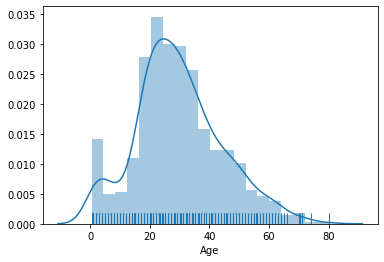

In [12]:
sns.distplot(tit['Age'], rug = True)
plt.title('Age distribution of all passengers')

Text(0.5, 1.0, 'Age')

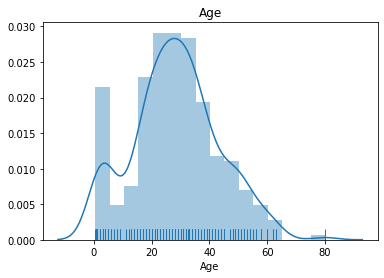

In [28]:
Survived = tit.loc[(tit['Survived'] == 1)]
sns.distplot(Survived['Age'], rug = True)
plt.title('Age distribution of surviving passengers')

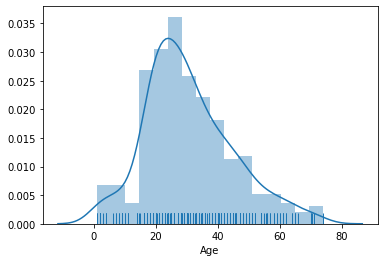

In [16]:
Drowned = tit.loc[(tit['Survived'] == 0)]
sns.distplot(Drowned['Age'], rug = True)
plt.title('Age distribution of passengers drowned')

# Step 6: Mean age of surv./drowned Passengers

In [25]:
tit_MeanAge = tit.groupby(['Survived']).Age.mean()
tit_MeanAge

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

# Step 7: Replace NAs with mean age

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

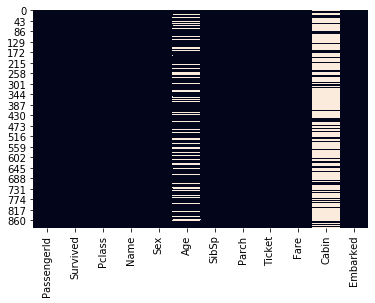

In [162]:
sns.heatmap(tit.isnull(),cbar=False)
tit.isnull().sum()

In [171]:
PclassAge.reset_index(inplace =True)
PclassAge

,index,Pclass,Sex,PassengerId,Survived,Age,SibSp,Parch,Fare
0,0,1,female,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
1,1,1,male,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127
2,2,2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121
3,3,2,male,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
4,4,3,female,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
5,5,3,male,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633


In [172]:
mean_age=tit.groupby(['Pclass', 'Sex'])['Age'].transform('mean')# generate a mean_age Series for replacing NAs according to the Pclass and Sex-Mean
mean_age

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: Age, Length: 891, dtype: float64

In [4]:
median_age=tit.groupby(['Pclass', 'Sex'])['Age'].transform('median')# generate a median_age Series for replacing NAs according to the Pclass and Sex-Mean
median_age

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64

In [169]:
tit['Age']= tit['Age'].fillna(median_age) # use the mean-age series to replace NAs
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


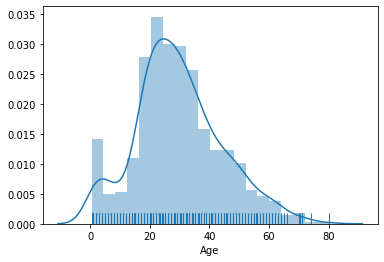

In [193]:
sns.distplot(tit['Age'], rug = True)

In [71]:
S2 = Survived.fillna(Survived['Age'].loc[Survived['Survived'] == 1].mean())
S2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28.3437,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,28.3437,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,28.3437,C


In [72]:
D2 = Drowned.fillna(Drowned['Age'].loc[Drowned['Survived'] == 0].mean())
D2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,30.6262,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,30.6262,S
5,6,0,3,"Moran, Mr. James",male,30.626179,0,0,330877,8.4583,30.6262,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,30.6262,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,30.6262,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,30.6262,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,30.6262,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.626179,1,2,W./C. 6607,23.4500,30.6262,S


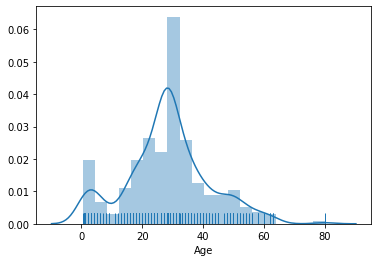

In [73]:
sns.distplot(S2['Age'], rug = True)

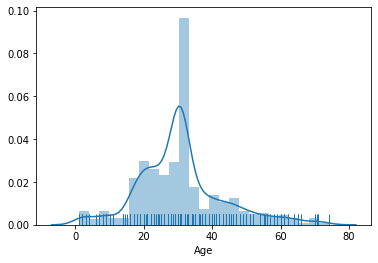

In [74]:
sns.distplot(D2['Age'], rug = True)

# Step 8: Tables for Surv./Drowned in differnt Pclasses

In [187]:
classSurv = tit.groupby(['Pclass', 'Survived', 'Sex']).count().reset_index()
classSurv

,Pclass,Survived,Sex,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,female,3,3,3,3,3,3,3,3,3
1,1,0,male,77,77,61,77,77,77,77,56,77
2,1,1,female,91,91,82,91,91,91,91,78,89
3,1,1,male,45,45,40,45,45,45,45,39,45
4,2,0,female,6,6,6,6,6,6,6,1,6
5,2,0,male,91,91,84,91,91,91,91,2,91
6,2,1,female,70,70,68,70,70,70,70,9,70
7,2,1,male,17,17,15,17,17,17,17,4,17
8,3,0,female,72,72,55,72,72,72,72,2,72
9,3,0,male,300,300,215,300,300,300,300,4,300
